**Lending Club Case Study**

We have the dataset and the data dictionary (DD) explaining the attributes. 
From data dictionary:
1. Understand the meaning of attributes, especially the ones with acronyms and short names as column names
2. Attribute description also helps to segregate variables into categorical and continuous (ordered / unordered)


**Data understanding:**
Comprehend the meaning of variables whose names are not clear:

*dti - Based on DD, this can be interpreted as debt to income ratio

emp_length - length of employment of borrower

out_prncp - outstanding principal amount of loan taken by borrower

pub_rec - Gives count of derogatory public records of borrower*


**Data Cleansing:**


raw_data - Initial complete loan dataset

loan_data - After cleaning columns where all of the records have null values which is not at all necessary


In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the raw data
raw_data = pd.read_csv('loan.csv', low_memory=False)

In [3]:
#Viewing high level view of data displaying the first 5 records 
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Data types of the columns of the raw data
raw_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

Columns in dataset and DD are compared. There are five columns given in data dictionary which are not present in dataset - fico_range_low, last_fico_range_high, last_fico_range_low, total_rev_hi_lim, verified_status_joint

**Drop unwanted columns and rows:**

In [5]:
#Columns with full NaN values are not of any use for the analysis. These can be dropped.
raw_data.isna().all().to_csv('loan_NaN.csv')

In [6]:
nan_col = pd.read_csv('loan_NaN.csv')

In [7]:
nan_col.columns = ['Col_name', 'NaN_Status']
nan_col.head()

,Col_name,NaN_Status
0,id,False
1,member_id,False
2,loan_amnt,False
3,funded_amnt,False
4,funded_amnt_inv,False


In [8]:
nan_col = nan_col[nan_col.NaN_Status==False]

In [9]:
nan_col.head()

,Col_name,NaN_Status
0,id,False
1,member_id,False
2,loan_amnt,False
3,funded_amnt,False
4,funded_amnt_inv,False


In [10]:
nan_col.Col_name.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [11]:
loan_data = raw_data[nan_col.Col_name.to_list()]

New dataframe with only 57 columns which contain atleast one non NaN value is created from raw data

In [12]:
#loan_data is the new dataset after removing columns with having all NaN values
loan_data.info()
loan_data.to_csv('loan_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [13]:
#Remove columns with more than 50% null values
null_pc = loan_data.isnull().sum()/len(loan_data.index) * 100
col_to_drop = null_pc[null_pc>50].keys()
col_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [14]:
loan_data = loan_data.drop(col_to_drop, axis=1) #3 columns dropped

In [15]:
#Drop the URL column, it doesn't contain any relevant information for this analysis
loan_data = loan_data.drop('url', axis=1)

In [16]:
loan_data.shape #total 53 columns remain

(39717, 53)

In [17]:
#Drop columns with all zero / null values

zero_col = loan_data.max()
zero_col = zero_col[zero_col ==0].keys()
loan_data = loan_data.drop(zero_col, axis=1)

loan_data.shape #total 48 columns remain

C:\Users\Renuka\AppData\Local\Temp\ipykernel_18760\659325284.py:3: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zero_col = loan_data.max()


(39717, 48)

In [18]:
same_val = loan_data.nunique()
same_val = same_val[same_val ==1].keys()
loan_data = loan_data.drop(same_val,axis=1)

loan_data.shape #total 44 columns remain

(39717, 44)

In [19]:
#Columns -  'desc', 'purpose' and 'title'  represents same attribute and 'purpose' is having more structured data. So, remaining two can be dropped

loan_data = loan_data.drop(['desc','title'], axis=1)
loan_data.shape #total 42 columns remain

(39717, 42)

In [20]:
# 'zip_code' can be dropped as it is partially masked and the purpose is served by 'addr_state' column
loan_data = loan_data.drop(['zip_code'], axis=1)
loan_data.shape #total 41 columns remain


(39717, 41)

In [21]:
loan_data.to_csv('loan_data.csv') #modified dataset backed up

**Standardise values:**

In [22]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [23]:
loan_data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [24]:
#Make 'term' & 'int_rate' as numeric values

loan_data.term = loan_data.term.str.replace(' months', '').astype(int)
loan_data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [25]:
loan_data.int_rate.value_counts()
loan_data.int_rate = loan_data.int_rate.str.replace('%', '').astype(float)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [26]:
#'emp_length' column have NaN values
loan_data.emp_length.isna().sum()

1075

In [27]:
#Replace NaN values in 'emp_length' with 0
loan_data.emp_length = loan_data.emp_length.fillna(0)

In [28]:
loan_data.emp_length.isna().sum()

0

In [29]:
# emp_length column: remove <, + , 'years. <1 & 1 to be considered as single catorgy. Same for 10 & 10+

loan_data.emp_length.value_counts()
loan_data.emp_length = loan_data.emp_length.str.replace('years', '')
loan_data.emp_length = loan_data.emp_length.str.replace('year', '')
loan_data.emp_length = loan_data.emp_length.str.replace('<', '')
loan_data.emp_length = loan_data.emp_length.str.replace('+', '')


C:\Users\Renuka\AppData\Local\Temp\ipykernel_18760\3583260114.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_data.emp_length = loan_data.emp_length.str.replace('+', '')


In [30]:
loan_data.emp_length = loan_data.emp_length.apply(pd.to_numeric)

In [31]:
loan_data.emp_length.describe()

count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [32]:
#Remove % symbol from 'revol_util' and make it numeric
loan_data.revol_util = loan_data.revol_util.str.replace('%', '').astype(float)
loan_data.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [33]:
loan_data.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp           

In [34]:
loan_data.to_csv('loan_data.csv')#modified data backed up

**Filtering:**

<Axes: >

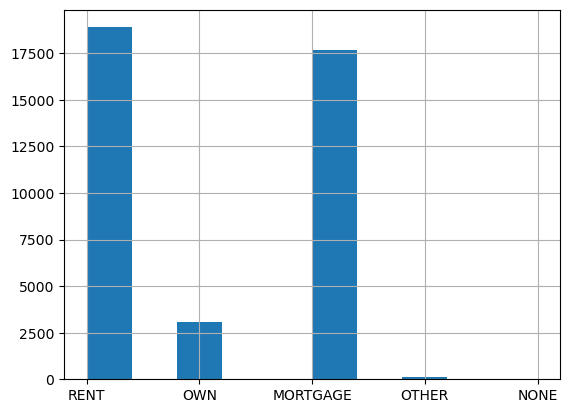

In [35]:
#Remove outliers -home ownership

loan_data.home_ownership.hist()

In [36]:
#OTHER & NONE are outliers, can be removed
loan_data.shape 
loan_data = loan_data[~loan_data.home_ownership.isin(['OTHER','NONE'])]
loan_data.shape

(39616, 41)

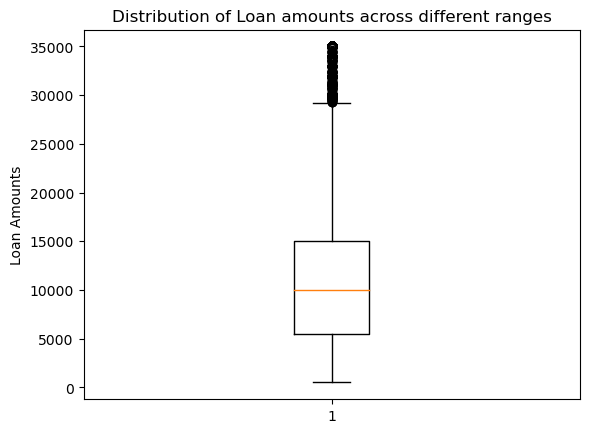

In [43]:
#Loan amount column analysis
##Box plot is done to see how well the loan amount is distributed as it gives us the insight of medium, minimum and maximum values
plt.boxplot(loan_data.loan_amnt)
plt.title('Distribution of Loan amounts across different ranges')
plt.ylabel('Loan Amounts')
plt.show()

Text(0.5, 1.0, 'Borrowers falling under different loan amount bins')

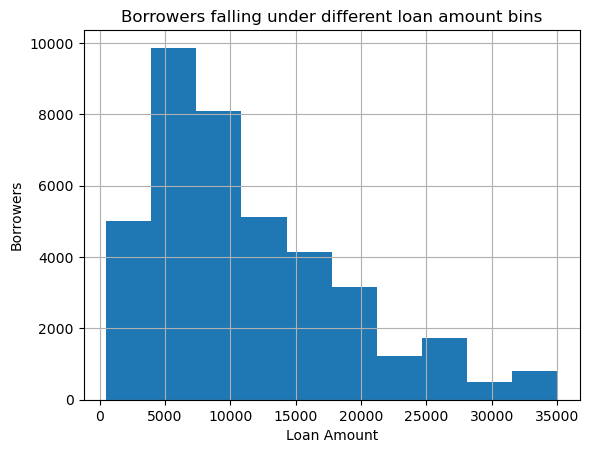

In [40]:
# Groupping into various bins of loan amounts
loan_data.loan_amnt.hist()
plt.xlabel('Loan Amount')
plt.ylabel('Borrowers')
plt.title("Borrowers falling under different loan amount bins")

In [41]:
pd.pivot_table(loan_data, index='loan_amnt', columns='loan_status', aggfunc='count').head(10)

addr_state                     annual_inc                     \
loan_status Charged Off Current Fully Paid Charged Off Current Fully Paid   
loan_amnt                                                                   
500                 NaN     NaN        5.0         NaN     NaN        5.0   
700                 NaN     NaN        1.0         NaN     NaN        1.0   
725                 NaN     NaN        1.0         NaN     NaN        1.0   
750                 NaN     NaN        1.0         NaN     NaN        1.0   
800                 NaN     NaN        1.0         NaN     NaN        1.0   
900                 1.0     NaN        1.0         1.0     NaN        1.0   
950                 NaN     NaN        1.0         NaN     NaN        1.0   
1000               46.0     3.0      251.0        46.0     3.0      251.0   
1050                1.0     NaN        3.0         1.0     NaN        3.0   
1075                NaN     NaN        1.0         NaN     NaN        1.0   

            collection_recovery_fee                    delinq_2yrs  ...  \
loan_status             Charged Off Current Fully Paid Charged Off  ...   
loan_amnt                                                           ...   
500                             NaN     NaN        5.0         NaN  ...   
700                             NaN     NaN        1.0         NaN  ...   
725                             NaN     NaN        1.0         NaN  ...   
750                             NaN     NaN        1.0         NaN  ...   
800                             NaN     NaN        1.0         NaN  ...   
900                             1.0     NaN        1.0         1.0  ...   
950                             NaN     NaN        1.0         NaN  ...   
1000                           46.0     3.0      251.0        46.0  ...   
1050                            1.0     NaN        3.0         1.0  ...   
1075                            NaN     NaN        1.0         NaN  ...   

            total_rec_int total_rec_late_fee                     \
loan_status    Fully Paid        Charged Off Current Fully Paid   
loan_amnt                                                         
500                   5.0                NaN     NaN        5.0   
700                   1.0                NaN     NaN        1.0   
725                   1.0                NaN     NaN        1.0   
750                   1.0                NaN     NaN        1.0   
800                   1.0                NaN     NaN        1.0   
900                   1.0                1.0     NaN        1.0   
950                   1.0                NaN     NaN        1.0   
1000                251.0               46.0     3.0      251.0   
1050                  3.0                1.0     NaN        3.0   
1075                  1.0                NaN     NaN        1.0   

            total_rec_prncp                    verification_status          \
loan_status     Charged Off Current Fully Paid         Charged Off Current   
loan_amnt                                                                    
500                     NaN     NaN        5.0                 NaN     NaN   
700                     NaN     NaN        1.0                 NaN     NaN   
725                     NaN     NaN        1.0                 NaN     NaN   
750                     NaN     NaN        1.0                 NaN     NaN   
800                     NaN     NaN        1.0                 NaN     NaN   
900                     1.0     NaN        1.0                 1.0     NaN   
950                     NaN     NaN        1.0                 NaN     NaN   
1000                   46.0     3.0      251.0                46.0     3.0   
1050                    1.0     NaN        3.0                 1.0     NaN   
1075                    NaN     NaN        1.0                 NaN     NaN   

                        
loan_status Fully Paid  
loan_amnt               
500                5.0  
700                1.0  
725                1.0 

In [44]:
#Loans less than 1000 are outliers with only 1 chargedoff case. These can be removed

loan_data[loan_data.loan_amnt <1000].loan_status

loan_data = loan_data[loan_data.loan_amnt >=1000]

loan_data.shape

(39604, 41)

In [45]:
loan_data.to_csv('loan_data.csv') #modified data backed up

In [46]:
#High loan amounts have significat number of defaulters. So it cannot be treated as outliers for this analysis
pd.pivot_table(loan_data, index='loan_amnt', columns='loan_status', aggfunc='count').tail(25)

addr_state                     annual_inc                     \
loan_status Charged Off Current Fully Paid Charged Off Current Fully Paid   
loan_amnt                                                                   
31725               NaN     NaN        1.0         NaN     NaN        1.0   
31800               NaN     NaN        1.0         NaN     NaN        1.0   
31825               2.0     NaN        6.0         2.0     NaN        6.0   
32000               6.0     2.0       24.0         6.0     2.0       24.0   
32250               NaN     NaN        1.0         NaN     NaN        1.0   
32275               NaN     1.0        NaN         NaN     1.0        NaN   
32350               2.0     1.0        NaN         2.0     1.0        NaN   
32400               1.0     NaN        2.0         1.0     NaN        2.0   
32500               NaN     NaN        2.0         NaN     NaN        2.0   
32525               NaN     NaN        1.0         NaN     NaN        1.0   
32775               NaN     NaN        1.0         NaN     NaN        1.0   
32875               NaN     1.0        1.0         NaN     1.0        1.0   
33000               2.0     NaN       10.0         2.0     NaN       10.0   
33250               NaN     NaN        1.0         NaN     NaN        1.0   
33425               1.0     NaN        1.0         1.0     NaN        1.0   
33500               1.0     NaN        1.0         1.0     NaN        1.0   
33600               NaN     2.0        4.0         NaN     2.0        4.0   
33950               2.0     1.0        6.0         2.0     1.0        6.0   
34000               2.0     2.0       11.0         2.0     2.0       11.0   
34200               NaN     NaN        1.0         NaN     NaN        1.0   
34475               1.0     NaN        4.0         1.0     NaN        4.0   
34525               NaN     NaN        1.0         NaN     NaN        1.0   
34675               NaN     NaN        1.0         NaN     NaN        1.0   
34800               NaN     NaN        2.0         NaN     NaN        2.0   
35000             150.0    78.0      451.0       150.0    78.0      451.0   

            collection_recovery_fee                    delinq_2yrs  ...  \
loan_status             Charged Off Current Fully Paid Charged Off  ...   
loan_amnt                                                           ...   
31725                           NaN     NaN        1.0         NaN  ...   
31800                           NaN     NaN        1.0         NaN  ...   
31825                           2.0     NaN        6.0         2.0  ...   
32000                           6.0     2.0       24.0         6.0  ...   
32250                           NaN     NaN        1.0         NaN  ...   
32275                           NaN     1.0        NaN         NaN  ...   
32350                           2.0     1.0        NaN         2.0  ...   
32400                           1.0     NaN        2.0         1.0  ...   
32500                           NaN     NaN        2.0         NaN  ...   
32525                           NaN     NaN        1.0         NaN  ...   
32775                           NaN     NaN        1.0         NaN  ...   
32875                           NaN     1.0        1.0         NaN  ...   
33000                           2.0     NaN       10.0         2.0  ...   
33250                           NaN     NaN        1.0         NaN  ...   
33425                           1.0     NaN        1.0         1.0  ...   
33500                           1.0     NaN        1.0         1.0  ...   
33600                           NaN     2.0        4.0         NaN  ...   
33950                           2.0     1.0        6.0         2.0  ...   
34000                           2.0     2.0       11.0         2.0  ...   
34200                           NaN     NaN        1.0         NaN  ...   
34475                           1.0     NaN        4.0         1.0  ...   
34525                           NaN     NaN        1.0  

**Univariate analysis**

In [47]:
#How loans are distributed based on the amount disbursed
loan_amt_dist = loan_data.groupby('loan_amnt').loan_amnt.count()
loan_amt_dist

loan_amnt
1000     300
1050       4
1075       1
1100       5
1125       1
        ... 
34475      5
34525      1
34675      1
34800      2
35000    679
Name: loan_amnt, Length: 878, dtype: int64

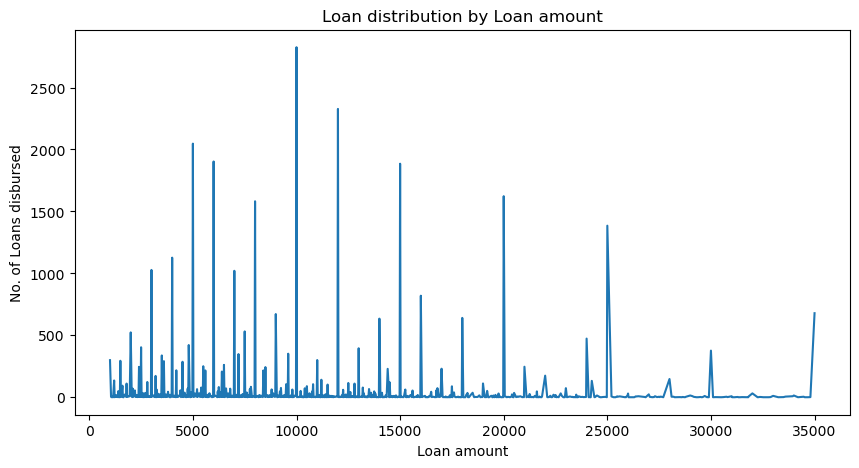

In [48]:
x = loan_amt_dist.index.tolist()
y = loan_amt_dist.values.tolist()

# set figure size
plt.figure(figsize=(10, 5))

# set title
plt.title('Loan distribution by Loan amount')

# set axis labels
plt.xlabel('Loan amount')
plt.ylabel('No. of Loans disbursed')


plt.plot(x, y)
plt.show()

Majority of loan amounts have rounded values, mainly multiples of 1000s

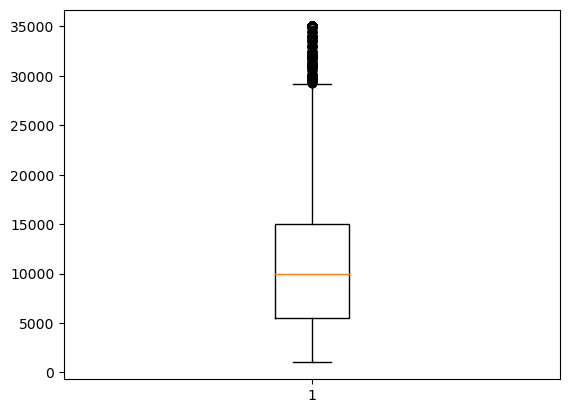

In [49]:
plt.boxplot(loan_data.loan_amnt)
plt.show()

50% of loans are having amount between 5000 and 15000

In [50]:
#% of defaulters out of total
avg_defaulters = loan_data.groupby('loan_status').loan_status.count()
avg_defaulters.head()
avg_defaulters['Total'] = avg_defaulters.sum()

In [51]:
avg_defaulters_pc = (avg_defaulters/avg_defaulters.Total)*100
avg_defaulters_pc =avg_defaulters_pc[:-1]
avg_defaulters_pc

loan_status
Charged Off    14.160186
Current         2.878497
Fully Paid     82.961317
Name: loan_status, dtype: float64

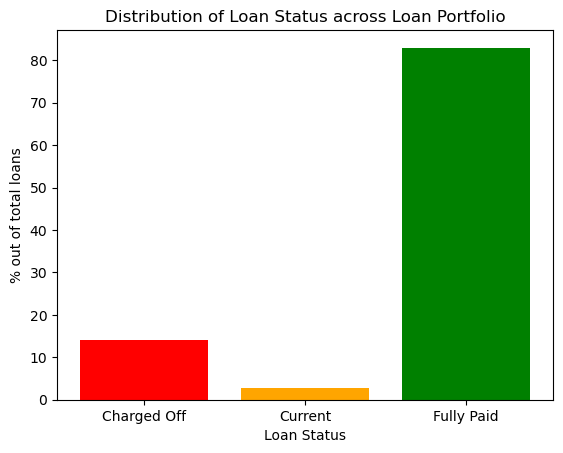

In [63]:
x = avg_defaulters_pc.index.tolist()
y = avg_defaulters_pc.values.tolist()

plt.xlabel('Loan Status')
plt.ylabel('% out of total loans')
plt.bar(x,y,color=['red', 'orange', 'green'])
plt.title('Distribution of Loan Status across Loan Portfolio')
plt.show()

In [53]:
#Create a business driven derived metric using this - >15000 are high value loans and <15000 as low value loans

loan_data['loan_value'] = loan_data.loan_amnt.apply(lambda x: 'high' if x >=15000 else 'low')

loan_data.loan_value.describe()

count     39604
unique        2
top         low
freq      28536
Name: loan_value, dtype: object

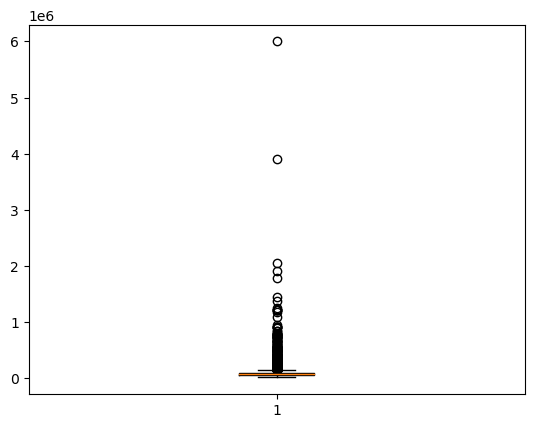

In [54]:
#Categorise based on income of customer

plt.boxplot(loan_data.annual_inc)
plt.show()

Annual income varies between 4000 to 60 lakhs which is a huge variance and difficult for analysis. Let us group the customers into 3 catogries:
1. low_inc  = < 5 lakhs
2. mid_inc = Between 5 & 10 lakhs
3. high_inc = > 10 lakhs

In [55]:
#Type driven derived variable
loan_data['inc_type'] = loan_data.annual_inc.apply(lambda x: 'high_inc' if x >=1000000 else ('mid_inc' if x>=500000 else 'low_inc'))

loan_data.inc_type.describe()

count       39604
unique          3
top       low_inc
freq        39533
Name: inc_type, dtype: object

More than interest rate, an average borrower measures the burden of loan comparing the money borrowed and money paid back. A variable referring this value will add a borrower's perspective as well to the analysis

In [56]:
#Data driven derived metric -pay ratio:  ratio of total payable amount to loan amount
loan_data['pay_ratio'] = (loan_data.term * loan_data.installment) / loan_data.loan_amnt

loan_data.pay_ratio.describe()

count    39604.000000
mean         1.226570
std          0.151450
min          0.113166
25%          1.142801
50%          1.202700
75%          1.279410
max          1.740050
Name: pay_ratio, dtype: float64

In [57]:
loan_data.to_csv('loan_data.csv') #modified data backed up

**Segmented univariate analysis**

In [58]:

#How loan portfolio is distributed against loan status
loan_stat = pd.pivot_table(loan_data, index='loan_status', aggfunc='mean')

C:\Users\Renuka\AppData\Local\Temp\ipykernel_18760\455740415.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  loan_stat = pd.pivot_table(loan_data, index='loan_status', aggfunc='mean')


In [59]:
loan_stat

,annual_inc,collection_recovery_fee,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,id,inq_last_6mths,installment,...,recoveries,revol_bal,revol_util,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,62433.061883,87.533375,0.169936,14.002940,5.202045,11750.285307,10870.574404,698917.718795,1.057061,335.882685,...,672.302355,13512.401926,55.607870,46.266762,21.425820,6836.352767,6369.099296,2195.938197,4.299833,3963.812338
Current,75430.665105,0.000000,0.141228,14.750009,6.152095,16485.701754,16318.265247,911656.866667,0.783333,395.476061,...,0.000000,16530.893860,53.204482,60.000000,23.313158,21852.875561,21582.041684,7150.753254,1.172878,14700.949465
Fully Paid,69868.070478,0.000000,0.142227,13.155016,5.041528,10625.195550,10124.702791,673588.556154,0.839542,320.250852,...,0.000000,13257.154553,47.549635,41.172389,22.165358,12734.366835,12123.444918,2108.316409,0.861300,10625.189228


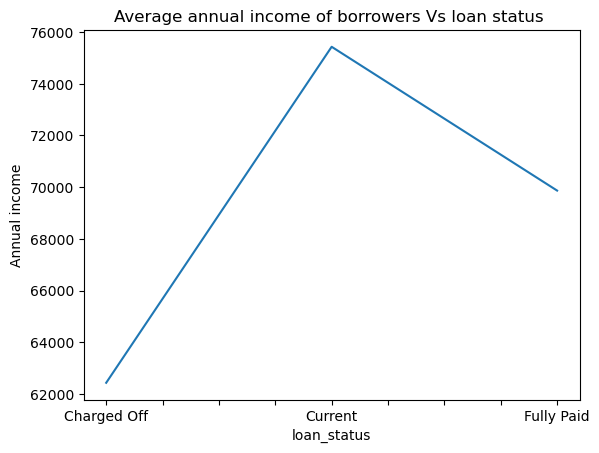

In [61]:
# Average annual income of borrowers Vs loan status
loan_stat.annual_inc.plot()
plt.ylabel('Annual income')
plt.title('Average annual income of borrowers Vs loan status ')
plt.show()

#### Observation: avg annual income of defaulters are mainly less than 65000


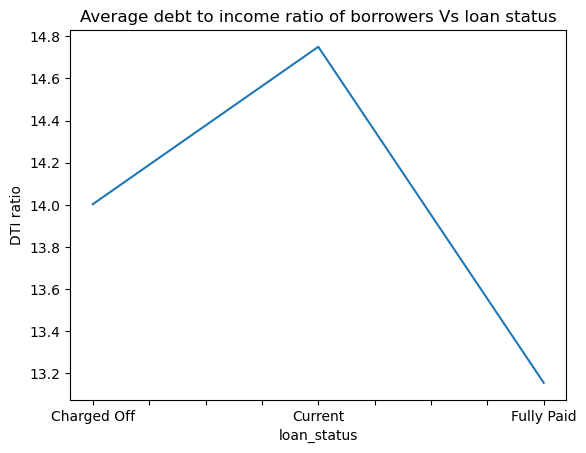

In [62]:
# Average debt to income ratio of borrowers Vs loan status
loan_stat.dti.plot() # Debt to income ratio - calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
plt.ylabel('DTI ratio')
plt.title('Average debt to income ratio of borrowers Vs loan status')
plt.show()

#### Observation: Average dti is 14 or above for defaulters

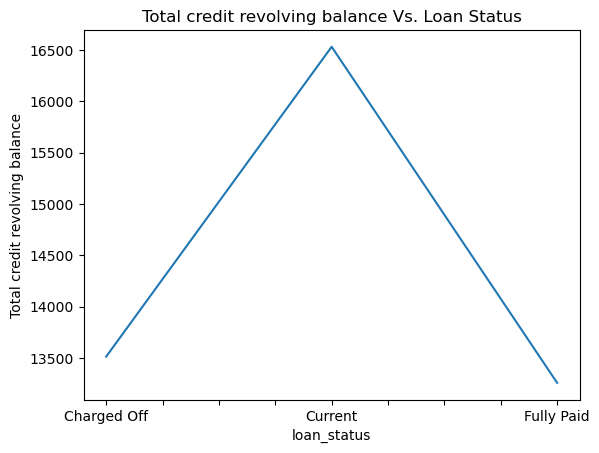

In [64]:
loan_stat.revol_bal.plot()
plt.title('Total credit revolving balance Vs. Loan Status')
plt.ylabel('Total credit revolving balance')
plt.show()

#### Observation: This plot doesn't give much insights as revolving balance is relevent only for active loans.

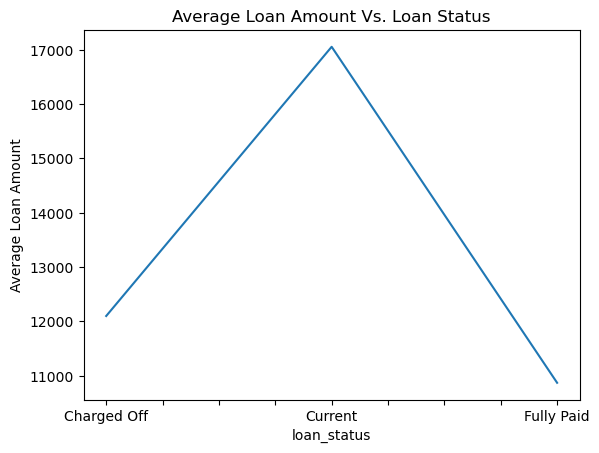

In [65]:
# Average loan amount Vs loan status
loan_stat.loan_amnt.plot()
plt.title('Average Loan Amount Vs. Loan Status')
plt.ylabel('Average Loan Amount')
plt.show()

#### Observation: Defaulted loans have average principal amount more than 12000

In [66]:
loan_data.loan_amnt.describe()

count    39604.000000
mean     11224.438188
std       7459.104773
min       1000.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Chance of defaulting is more if loan amount > 12000

In [67]:
#Loan Purpose Vs Defaulters
loan_purp = loan_data[loan_data.loan_status == 'Charged Off'].purpose

**Bivariate analysis**

In [68]:

loan_purp_dist = loan_purp.value_counts()
loan_purp_dist

debt_consolidation    2760
other                  631
credit_card            540
small_business         471
home_improvement       346
major_purchase         222
car                    159
medical                106
wedding                 96
moving                  91
house                   59
educational             55
vacation                53
renewable_energy        19
Name: purpose, dtype: int64

In [69]:
#Top 10 categories of loans which are defaults
loan_purp_dist = loan_purp_dist[:10]
loan_purp_dist

debt_consolidation    2760
other                  631
credit_card            540
small_business         471
home_improvement       346
major_purchase         222
car                    159
medical                106
wedding                 96
moving                  91
Name: purpose, dtype: int64

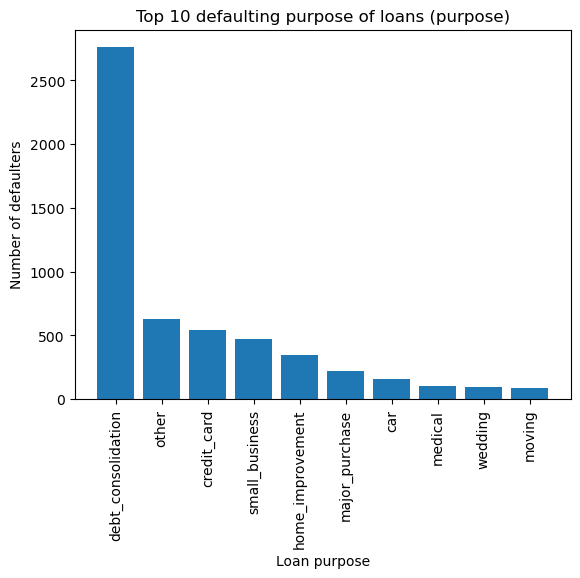

In [70]:
plt.title('Top 10 defaulting purpose of loans (purpose)')

x = loan_purp_dist.index.tolist()
y = loan_purp_dist.values.tolist()
plt.xlabel('Loan purpose')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=90)
plt.bar(x,y)

plt.show()

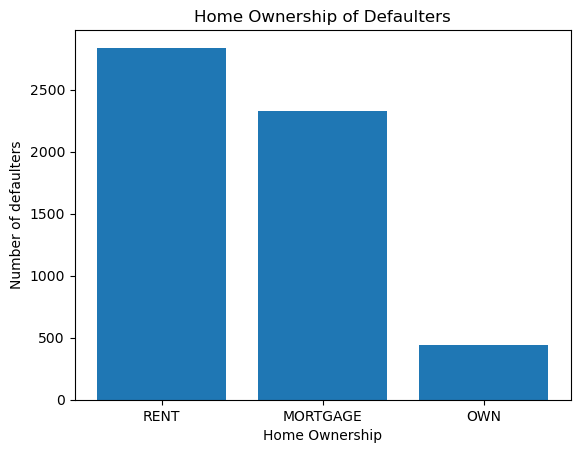

In [71]:
#Home ownership of Defaulters

loan_home_ownership = loan_data[loan_data.loan_status == 'Charged Off'].home_ownership
loan_home_ownership_dist = loan_home_ownership.value_counts()

plt.title('Home Ownership of Defaulters')

x = loan_home_ownership_dist.index.tolist()
y = loan_home_ownership_dist.values.tolist()

plt.xlabel('Home Ownership')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

#### Observation: Majority of defaulters have rented apartments or their home under mortgage

### Grade and Sub-grade are type-driven metrics - They are ordinal variables which is compared against the defaulters

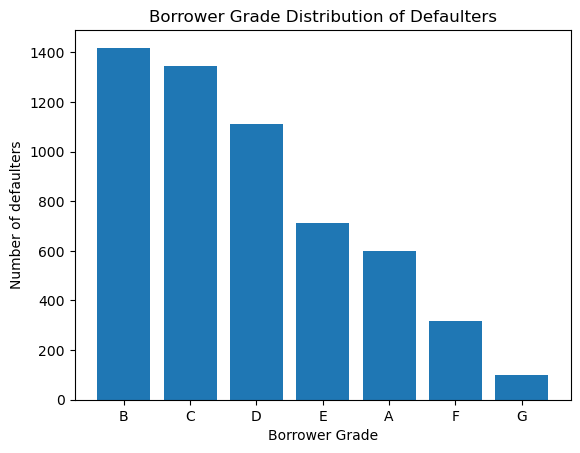

In [72]:
#Borrower grade Vs defaulters

cust_grade = loan_data[loan_data.loan_status == 'Charged Off'].grade
cust_grade_dist = cust_grade.value_counts()

plt.title('Borrower Grade Distribution of Defaulters')

x = cust_grade_dist.index.tolist()
y = cust_grade_dist.values.tolist()

plt.xlabel('Borrower Grade')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

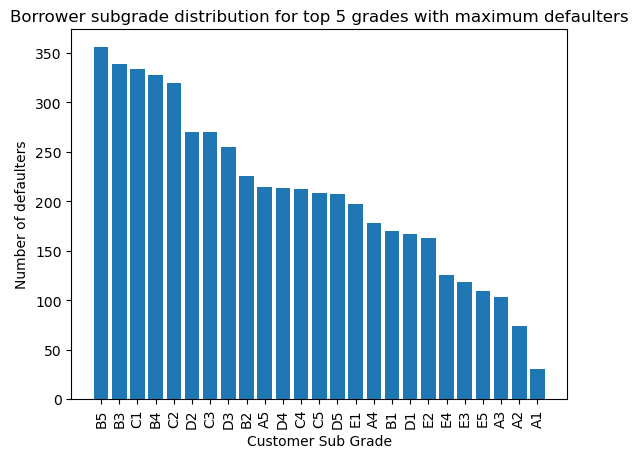

In [73]:
#Borrower subgrade distribution for top 5 grades with maximum defaulters

cust_sub_grade = loan_data[(loan_data.loan_status == 'Charged Off') & (loan_data.grade.isin(['A','B','C','D','E']))].sub_grade
cust_sub_grade_dist = cust_sub_grade.value_counts()

plt.title('Borrower subgrade distribution for top 5 grades with maximum defaulters')

x = cust_sub_grade_dist.index.tolist()
y = cust_sub_grade_dist.values.tolist()

plt.xlabel('Customer Sub Grade')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=90)
plt.bar(x,y)

plt.show()

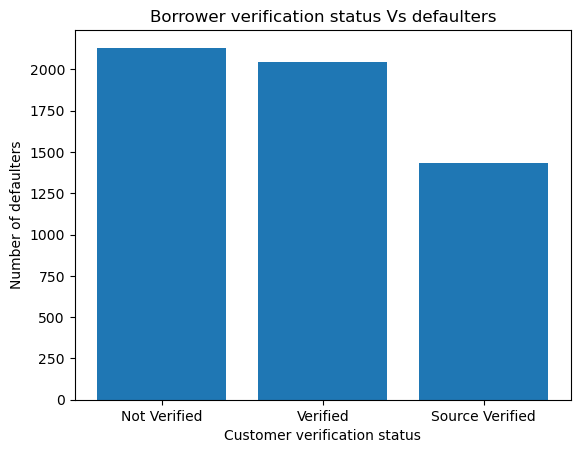

In [74]:
#Borrower verification status Vs defaulters

ver_status = loan_data[loan_data.loan_status == 'Charged Off'].verification_status
ver_status_dist = ver_status.value_counts()

plt.title('Borrower verification status Vs defaulters')

x = ver_status_dist.index.tolist()
y = ver_status_dist.values.tolist()

plt.xlabel('Customer verification status')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)

plt.show()

#### Observation: A large group of defaulters are not verified, majority of defaulters are not source verified

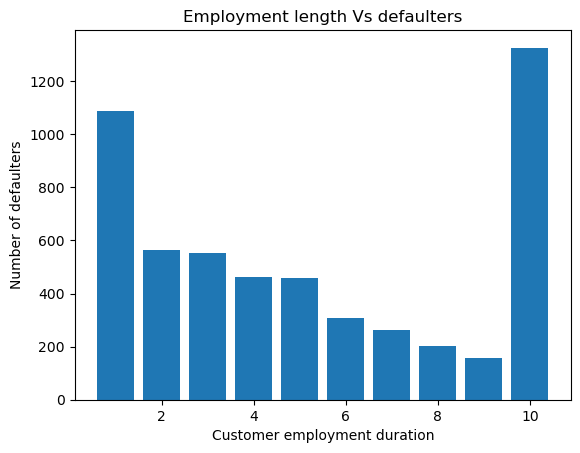

In [77]:
#Employment length Vs defaulters

emp_duration = loan_data[loan_data.loan_status == 'Charged Off'].emp_length
emp_duration_dist = emp_duration.value_counts()

plt.title('Employment length Vs defaulters')

x = emp_duration_dist.index.tolist()
y = emp_duration_dist.values.tolist()

plt.xlabel('Customer employment duration')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

#### Observation: Majority of defaulters are having an employment length less than 5 years

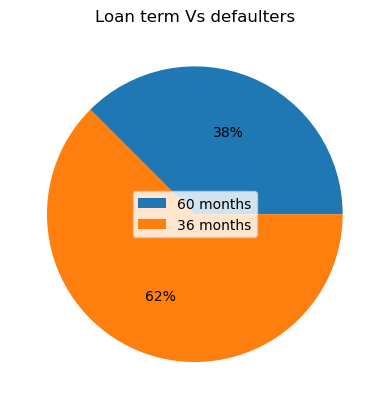

In [78]:
#Loan term Vs defaulters

loan_term = loan_data[loan_data.loan_status == 'Charged Off'].term
loan_term_dist = loan_term.value_counts()

plt.title('Loan term Vs defaulters')
plt.pie(x=loan_term_dist.index, autopct='%1.0f%%')
labels =['60 months', '36 months']
plt.legend(labels, loc="center")
plt.show()

In [79]:
#Pay ratio Vs loan status

pay_ratio_dist = pd.pivot_table(loan_data, index='loan_status', values='pay_ratio', aggfunc='mean')
pay_ratio_dist

,pay_ratio
loan_status,
Charged Off,1.286682
Current,1.399042
Fully Paid,1.210325


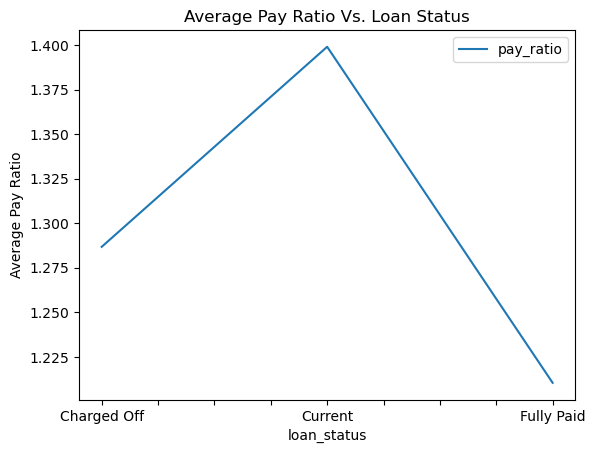

In [80]:

#plt.xticks(rotation=90)
pay_ratio_dist.plot()
plt.title('Average Pay Ratio Vs. Loan Status')
plt.ylabel('Average Pay Ratio')
plt.show()

#### Observation: Average pay ratio is higher than 1.275 for defaulters and this is very high compared to fully paid loans

In [81]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_value,inc_type,pay_ratio
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,low,low_inc,1.172664
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,low,low_inc,1.435920
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,low,low_inc,1.264950
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,low,low_inc,1.221516
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,low,low_inc,1.355800


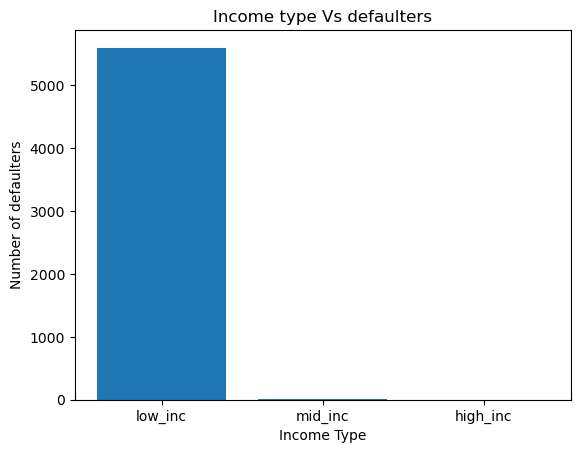

In [82]:
#Income type vs Defaulters

income_type = loan_data[loan_data.loan_status == 'Charged Off'].inc_type
income_type_dist = income_type.value_counts()

income_type_dist

plt.title('Income type Vs defaulters')

x = income_type_dist.index.tolist()
y = income_type_dist.values.tolist()

plt.xlabel('Income Type')
plt.ylabel('Number of defaulters')
#plt.xticks(rotation=90)
plt.bar(x,y)

plt.show()

#### Observation: More than 90% of defaulters belongs to low income group (<5 lakhs)

In [85]:
loan_data.to_csv('loan_data.csv')

In [86]:
##Setting up id as index column, as it is unique, whereas member id is not considered as same member can apply for 1 or 2 loans
## Setting up index is useful for faster runtime, slicing and manipulation
# id column is unique for all rows
loan_data.set_index('id', inplace=True)

In [87]:
loan_data.index

Int64Index([1077501, 1077430, 1077175, 1076863, 1075358, 1075269, 1069639,
            1072053, 1071795, 1071570,
            ...
              92666,   92552,   92533,   92507,   92402,   92187,   90665,
              90395,   90376,   87023],
           dtype='int64', name='id', length=39604)

In [88]:
loan_data.iloc[:,:10]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title
id,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group
...,...,...,...,...,...,...,...,...,...,...
92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research
90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd."
90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN


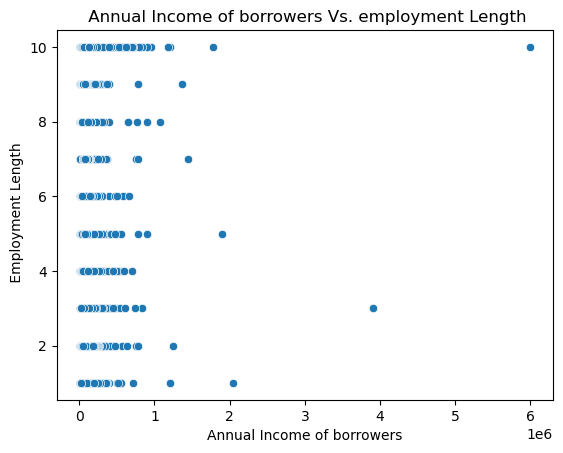

In [90]:
##Bivariate analysis of continuous vs continuous variables
##Annual income vs employment length
##Scatter plot is used to determine the vital relationship between two variables
sns.scatterplot(x=loan_data.annual_inc,y=loan_data.emp_length)
plt.title(' Annual Income of borrowers Vs. employment Length')
plt.xlabel('Annual Income of borrowers')
plt.ylabel(' Employment Length')
plt.show()

In [91]:
##Finding the correlation between continuous variables
loan_data[['loan_amnt', 'int_rate',  'emp_length','annual_inc']].corr()

,loan_amnt,int_rate,emp_length,annual_inc
loan_amnt,1.000000,0.309138,0.154333,0.270919
int_rate,0.309138,1.000000,0.005778,0.053076
emp_length,0.154333,0.005778,1.000000,0.111918
annual_inc,0.270919,0.053076,0.111918,1.000000


KDE plots are used to plot the data against bivariate variables to depict the probability distribution of one with respect to the other values.

In [92]:
##Bivariate analysis of continuous Vs categorical variables
##GroupBy: Performing GroupBy operation on the continuous variables.
##Groupby allows us to perform computations for better analysis.
grouping_charged_off = loan_data.groupby(by='loan_status').get_group('Charged Off').agg('mean')[['loan_amnt', 'int_rate',  'emp_length','annual_inc']]

C:\Users\Renuka\AppData\Local\Temp\ipykernel_18760\2443984859.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouping_charged_off = loan_data.groupby(by='loan_status').get_group('Charged Off').agg('mean')[['loan_amnt', 'int_rate',  'emp_length','annual_inc']]


In [94]:
print(type(grouping_charged_off))
print(grouping_charged_off)
print(grouping_charged_off.loan_amnt)

<class 'pandas.core.series.Series'>
loan_amnt     12101.110021
int_rate         13.823101
emp_length        5.202045
annual_inc    62433.061883
dtype: float64
12101.110021398003


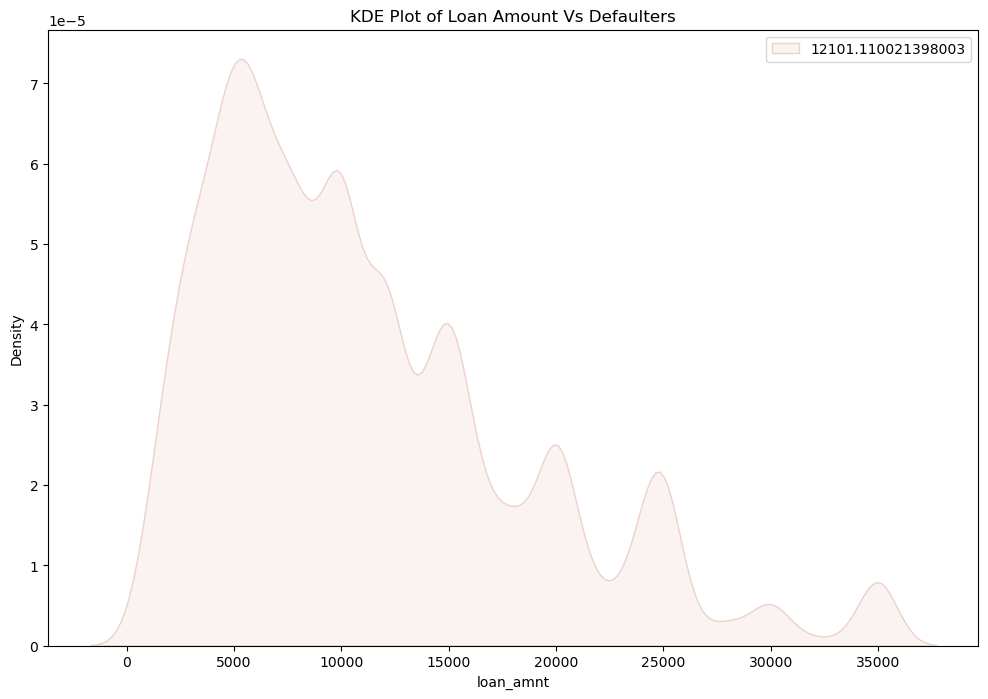

In [95]:
#Based on the above comparison, we can identify how much average loan amount and annual income along with 
#interest rate and number of years of employment is affecting the defaulters
##Plotting KDE plots to see how each variable is associated with the Charged Off status

#Loan Amount Vs. Defaulters

plt.figure(figsize=(12,8))
plt.title('KDE Plot of Loan Amount Vs Defaulters')
sns.kdeplot(data=loan_data, x='loan_amnt', hue=grouping_charged_off.loan_amnt,fill=True)
##This helps in understanding how loan amount is distributed with the defaulters and is specifically high between the range of 5000 to 10000

plt.show()

#### Observation - There is a lot of defaulters who have taken loan amounts between 5000 to 10000

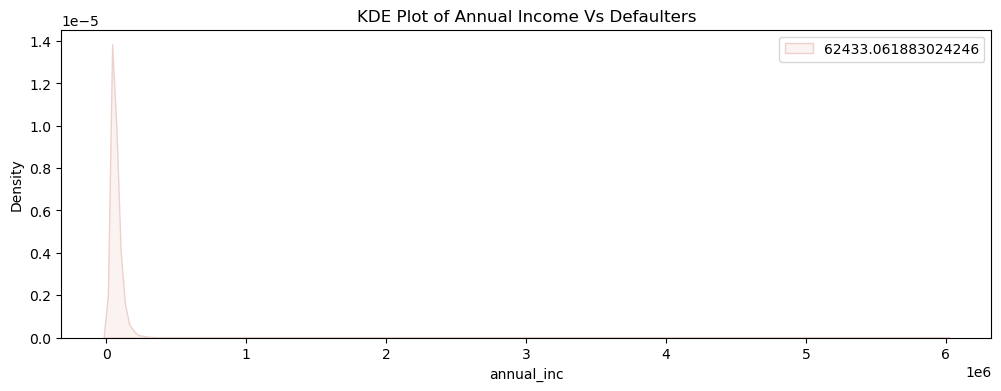

In [96]:
#Annual Income Vs. Defaulters

plt.figure(figsize=(12,4))
plt.title('KDE Plot of Annual Income Vs Defaulters')
sns.kdeplot(data=loan_data, x='annual_inc', hue=grouping_charged_off.annual_inc,fill=True)
plt.show()

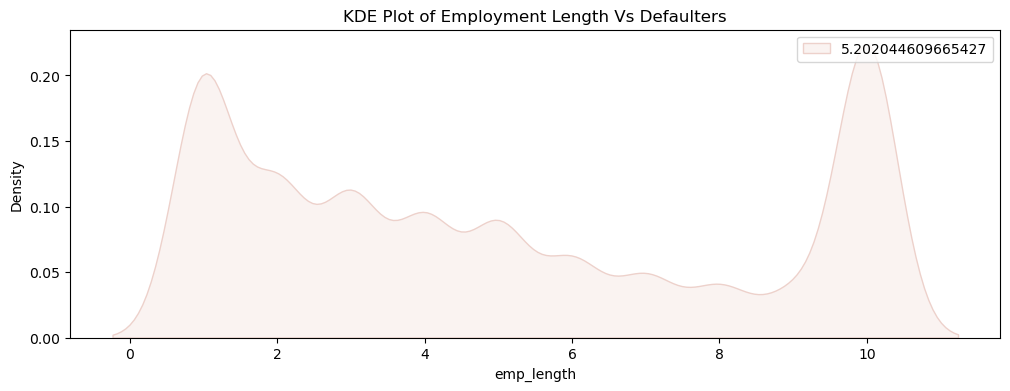

In [97]:
#Employment Length Vs. Defaulters

plt.figure(figsize=(12,4))
plt.title('KDE Plot of Employment Length Vs Defaulters')
sns.kdeplot(data=loan_data, x='emp_length', hue=grouping_charged_off.emp_length,fill=True)
plt.show()

#### Observation - Large number of defaulters fall in the range around 10+ years while there are some of them similarly in the range of 0-2 years

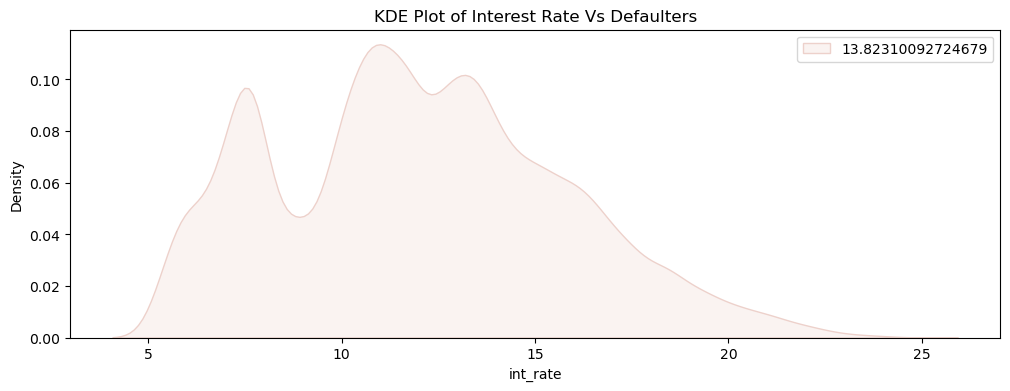

In [98]:
#Interest Rate Vs. Defaulters

plt.figure(figsize=(12,4))
plt.title('KDE Plot of Interest Rate Vs Defaulters')
sns.kdeplot(data=loan_data, x='int_rate', hue=grouping_charged_off.int_rate,fill=True)
plt.show()

#### Observation - If the interest rate is between 10-15%, then the defaulters number increases

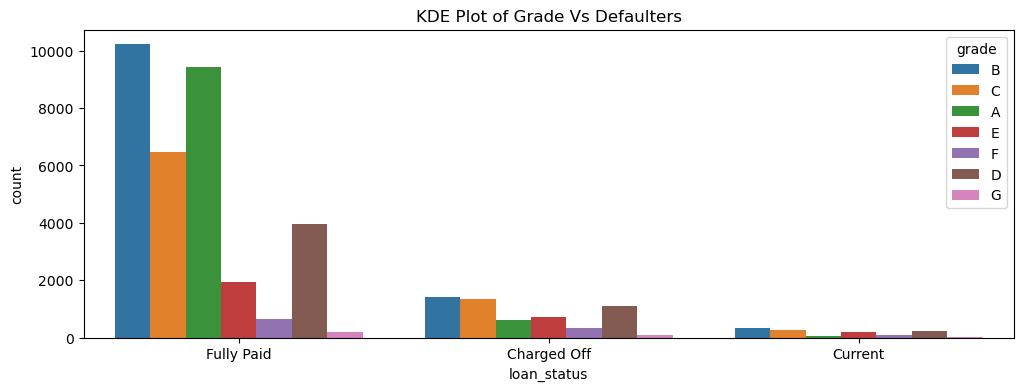

In [103]:
#Observation - If the interest rate is between 10-15%,then the defaulters number increases
##Bivariate Analysis - Categorical vs categorical
##Keeping charged Off status as fixed and comparing with other categorical columns

#Grade vs Defaulter

plt.figure(figsize=(12,4))
plt.title('KDE Plot of Grade Vs Defaulters')
sns.countplot(x=loan_data.loan_status, hue=loan_data.grade)
plt.show()

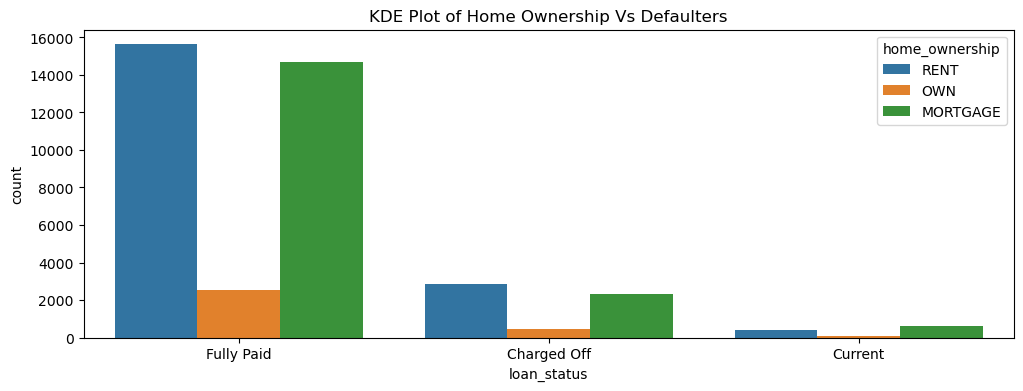

In [101]:
#Home Ownership vs Defaulter

plt.figure(figsize=(12,4))
plt.title('KDE Plot of Home Ownership Vs Defaulters')
sns.countplot(x=loan_data.loan_status, hue=loan_data.home_ownership)
plt.show()

In [109]:
##Correlation of all the data -1 to +1 to check how positively or negatively variables are correlated.
corr = loan_data.corr()
corr


C:\Users\Renuka\AppData\Local\Temp\ipykernel_18760\4010698481.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_data.corr()


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,pay_ratio
member_id,1.000000,0.140020,0.149487,0.256206,0.232557,0.074436,0.080520,0.116571,0.009081,0.095993,...,0.138882,0.227549,0.111037,0.172413,-0.057209,0.031741,-0.015047,0.122939,-0.009165,0.200619
loan_amnt,0.140020,1.000000,0.981649,0.940497,0.361190,0.309138,0.930304,0.154333,0.270919,0.066283,...,0.886711,0.854650,0.852115,0.729733,0.044231,0.135463,0.072994,0.448797,-0.037533,0.207875
funded_amnt,0.149487,0.981649,1.000000,0.958799,0.340621,0.312412,0.956117,0.153920,0.266706,0.066147,...,0.903221,0.871146,0.870302,0.737470,0.046153,0.136330,0.074897,0.453118,-0.038822,0.306007
funded_amnt_inv,0.256206,0.940497,0.958799,1.000000,0.360398,0.306601,0.905592,0.164467,0.254495,0.074261,...,0.881445,0.913200,0.846095,0.730908,0.026846,0.123806,0.060617,0.442718,-0.043043,0.319761
term,0.232557,0.361190,0.340621,0.360398,1.000000,0.452072,0.101991,0.113052,0.046739,0.082021,...,0.333710,0.349343,0.221507,0.529828,0.011486,0.101524,0.031834,0.232833,0.011629,0.616976
int_rate,0.074436,0.309138,0.312412,0.306601,0.452072,1.000000,0.282364,0.005778,0.053076,0.111018,...,0.308158,0.303683,0.186638,0.529926,0.092909,0.122504,0.066615,0.157717,0.082316,0.730441
installment,0.080520,0.930304,0.956117,0.905592,0.101991,0.282364,1.000000,0.124796,0.270545,0.054166,...,0.857029,0.817978,0.850892,0.634724,0.055912,0.118164,0.075714,0.401668,-0.034409,0.202636
emp_length,0.116571,0.154333,0.153920,0.164467,0.113052,0.005778,0.124796,1.000000,0.111918,0.050975,...,0.139235,0.149053,0.129233,0.125972,-0.015299,0.024596,0.006371,0.077419,0.061395,0.048118
annual_inc,0.009081,0.270919,0.266706,0.254495,0.046739,0.053076,0.270545,0.111918,1.000000,-0.122683,...,0.257755,0.247262,0.259290,0.185497,0.006345,0.021427,0.015627,0.139684,-0.016692,0.021596
dti,0.095993,0.066283,0.066147,0.074261,0.082021,0.111018,0.054166,0.050975,-0.122683,1.000000,...,0.064627,0.071307,0.041179,0.105923,-0.012014,0.024879,0.010872,0.005357,0.005636,0.086203


In [110]:
corr_driver_variables = loan_data[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc', 'dti', 'total_pymnt','pay_ratio']].corr()
corr_driver_variables

C:\Users\Renuka\AppData\Local\Temp\ipykernel_18760\1873048266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_driver_variables = loan_data[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc', 'dti', 'total_pymnt','pay_ratio']].corr()


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,total_pymnt,pay_ratio
loan_amnt,1.000000,0.361190,0.309138,0.930304,0.154333,0.270919,0.066283,0.886711,0.207875
term,0.361190,1.000000,0.452072,0.101991,0.113052,0.046739,0.082021,0.333710,0.616976
int_rate,0.309138,0.452072,1.000000,0.282364,0.005778,0.053076,0.111018,0.308158,0.730441
installment,0.930304,0.101991,0.282364,1.000000,0.124796,0.270545,0.054166,0.857029,0.202636
emp_length,0.154333,0.113052,0.005778,0.124796,1.000000,0.111918,0.050975,0.139235,0.048118
annual_inc,0.270919,0.046739,0.053076,0.270545,0.111918,1.000000,-0.122683,0.257755,0.021596
dti,0.066283,0.082021,0.111018,0.054166,0.050975,-0.122683,1.000000,0.064627,0.086203
total_pymnt,0.886711,0.333710,0.308158,0.857029,0.139235,0.257755,0.064627,1.000000,0.303184
pay_ratio,0.207875,0.616976,0.730441,0.202636,0.048118,0.021596,0.086203,0.303184,1.000000


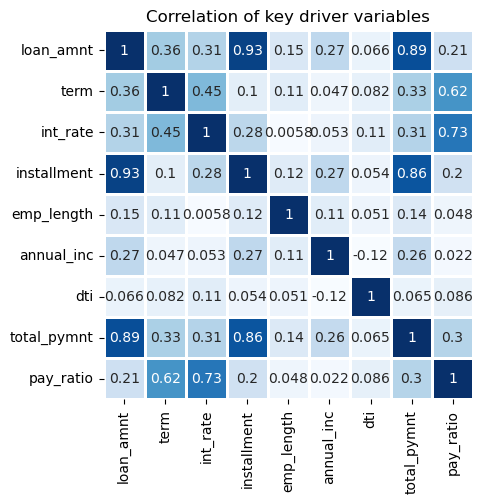

In [114]:
##Heatmap is plotted to get insights on how one variable is influencing the other variable, what kind of relationship based on the correlation values.

ax1 = sns.heatmap(corr_driver_variables, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', annot=True)
plt.title('Correlation of key driver variables')
plt.show()


#### Observation -1 is negatively correlated whereas +1 is positively correlated when one increases the other increases as well, based on the above heatmap. Anything closer towards 1 like 0.70+ has positive relation with the other variable.

Loan Amount and installment has a higher correlation of 0.93.
The pay ratio and interest rate has a correlation value of 0.73.

Annual income and dti have a negative correlation, which shows that debt burden decreases as annual income increases.



**Conclusion**

Analysis of loan data gives the following insights:

1. Out of the total loan data analysed, only active loans are those with higher team of repayment - 60 months and their volume is also low compared to other two categories. Hence the analysis become more meaningful by keeping the focus on charged off data and fully paid data. However we have included the active loan data as well in plots to give a comparative analysis.

2. Data cleansing and standardisation were done focusing on variables which are useful for achieving required business objective - decision driven data analytics strategy is used here.

Decision to be taken: How to avoid giving loans to potential defaulters

So data analytics should focus on: customer & loan attributes that can provide insights towards the tendency of defaulting.


3. Business, type and data driven metrices are derived which can give more insights into the business requirement.

4. Univariate, segmented univariate and bivariate analysis techniques are used to gain insights from the dataset.

5. Plots are majorly used to highlight the impact of various attributes towards the tendency of defaulting.


From the analysis, following are the factors identified which can lead to the tendency of defaulting:

**Customer attributes affecting tendency for defaulting:**
Home ownership (rented or mortgaged)

Average annual income (less than 65000)

Employment length (less than 5 years)

Debt to income ratio of customer (Above 14)

Grade of borrower

**Loan attributes affecting tendency for defaulting**

Loan Amount (> 12000)

Term of loan 

Pay ratio 

Interest rate
